In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Librerías para ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

In [6]:
dataml = pd.read_csv("Data1.csv")
dataml.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,...,Name_minMaxScaled,Sex_minMaxScaled,Equipment_minMaxScaled,Age_minMaxScaled,Division_minMaxScaled,BodyweightKg_minMaxScaled,WeightClassKg_minMaxScaled,BestSquatKg_minMaxScaled,BestBenchKg_minMaxScaled,BestDeadliftKg_minMaxScaled
0,1,96,119,47,3,59.60,19,47.63,20.41,70.31,...,0.0,0.0,0.399225,0.627451,0.022472,0.084934,0.159574,0.000000,0.000000,0.000000
1,12,96,16,42,7,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.067416,0.076209,0.159574,0.233324,0.279650,0.305956
2,12,96,16,42,31,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.337079,0.076209,0.159574,0.233324,0.279650,0.305956
3,12,96,274,42,31,58.51,19,185.00,95.25,213.70,...,0.5,0.0,1.000000,0.529412,0.337079,0.076209,0.159574,0.336501,0.279650,0.471833
4,1,96,274,18,3,63.68,31,185.00,31.75,90.72,...,0.0,0.0,1.000000,0.058824,0.022472,0.117595,0.287234,0.336501,0.042374,0.067160


Selección de variables features y target

In [7]:
X=dataml[['BodyweightKg','BestBenchKg']]
y=dataml['Place']

Partición de datos para prueba y entrenamiento

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024, shuffle=True)

In [9]:
std_scaler= StandardScaler()
std_scaler.fit(X_train)

X_std_train= std_scaler.transform(X_train)
X_std_test= std_scaler.transform(X_test) # evitamos fuga de datos entre train y test

In [10]:
X_combinde_std = np.vstack((X_std_train, X_std_test))
y_combinde= np.hstack([y_train, y_test])

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataml['Place']= encoder.fit_transform(dataml['Place'])

In [15]:
# Features Store
dataml.to_csv("Data_Features_V1.csv", index=False)

In [16]:
dataml.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,...,Name_minMaxScaled,Sex_minMaxScaled,Equipment_minMaxScaled,Age_minMaxScaled,Division_minMaxScaled,BodyweightKg_minMaxScaled,WeightClassKg_minMaxScaled,BestSquatKg_minMaxScaled,BestBenchKg_minMaxScaled,BestDeadliftKg_minMaxScaled
0,1,96,119,47,3,59.60,19,47.63,20.41,70.31,...,0.0,0.0,0.399225,0.627451,0.022472,0.084934,0.159574,0.000000,0.000000,0.000000
1,12,96,16,42,7,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.067416,0.076209,0.159574,0.233324,0.279650,0.305956
2,12,96,16,42,31,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.337079,0.076209,0.159574,0.233324,0.279650,0.305956
3,12,96,274,42,31,58.51,19,185.00,95.25,213.70,...,0.5,0.0,1.000000,0.529412,0.337079,0.076209,0.159574,0.336501,0.279650,0.471833
4,1,96,274,18,3,63.68,31,185.00,31.75,90.72,...,0.0,0.0,1.000000,0.058824,0.022472,0.117595,0.287234,0.336501,0.042374,0.067160


In [17]:
#Features Store
dataml.to_csv("Data_features_V1.csv", index= False)

## 1. Construcción de Modelos

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metricas
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#gestion de train_test
from sklearn.model_selection import train_test_split

#transformaciones
from sklearn.preprocessing import MinMaxScaler


In [19]:
datamodel = pd.read_csv("Data_features_V1.csv")
datamodel.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,...,Name_minMaxScaled,Sex_minMaxScaled,Equipment_minMaxScaled,Age_minMaxScaled,Division_minMaxScaled,BodyweightKg_minMaxScaled,WeightClassKg_minMaxScaled,BestSquatKg_minMaxScaled,BestBenchKg_minMaxScaled,BestDeadliftKg_minMaxScaled
0,1,96,119,47,3,59.60,19,47.63,20.41,70.31,...,0.0,0.0,0.399225,0.627451,0.022472,0.084934,0.159574,0.000000,0.000000,0.000000
1,12,96,16,42,7,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.067416,0.076209,0.159574,0.233324,0.279650,0.305956
2,12,96,16,42,31,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.337079,0.076209,0.159574,0.233324,0.279650,0.305956
3,12,96,274,42,31,58.51,19,185.00,95.25,213.70,...,0.5,0.0,1.000000,0.529412,0.337079,0.076209,0.159574,0.336501,0.279650,0.471833
4,1,96,274,18,3,63.68,31,185.00,31.75,90.72,...,0.0,0.0,1.000000,0.058824,0.022472,0.117595,0.287234,0.336501,0.042374,0.067160


## Selección de target y features

In [20]:
X = datamodel.drop('Place', axis=1) # Features - lo que se va a utilizar para predecir
y = datamodel['Place'] # Target - lo que que voy a predecir

In [21]:
## Split para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024, shuffle=True)

In [22]:
# Creamos y aplicamos escalado de datos
scaler = MinMaxScaler()

scaler.fit(X_train) # calculamos el scaler

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,...,Name_minMaxScaled,Sex_minMaxScaled,Equipment_minMaxScaled,Age_minMaxScaled,Division_minMaxScaled,BodyweightKg_minMaxScaled,WeightClassKg_minMaxScaled,BestSquatKg_minMaxScaled,BestBenchKg_minMaxScaled,BestDeadliftKg_minMaxScaled
16,2,96,119,25,31,77.93,43,142.88,68.04,136.08,...,0.045455,0.0,0.399225,0.196078,0.337079,0.231668,0.414894,0.233324,0.177976,0.216420
109,1,339,274,23,42,98.88,98,227.50,137.50,250.00,...,0.000000,1.0,1.000000,0.156863,0.460674,0.399376,1.000000,0.440609,0.437523,0.591280
423,23,339,274,46,19,99.52,98,185.00,175.00,257.50,...,1.000000,1.0,1.000000,0.607843,0.202247,0.404499,1.000000,0.336501,0.577647,0.615959
198,2,339,119,58,2,172.37,7,319.78,183.70,272.16,...,0.045455,1.0,0.399225,0.843137,0.011236,0.987672,0.031915,0.666659,0.610156,0.664199
179,3,339,274,39,3,88.90,75,181.44,192.78,244.94,...,0.090909,1.0,1.000000,0.470588,0.022472,0.319484,0.755319,0.327781,0.644085,0.574630


# 1.a Naive Bayes

In [24]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

nb_predicts = nb_classifier.predict(X_test_scaled)

acc = accuracy_score(nb_predicts, y_test)
print ("Acurracy:", acc)

Acurracy: 0.9923664122137404


In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

## 1.b LDA

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# Definir las variables predictoras (excluyendo la variable objetivo 'Place' y otras no predictoras)
predictors = dataml.drop(columns=['Place', 'Name'])  # Asumimos que 'Name' no es predictora útil
target = dataml['Place']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

# Crear y entrenar el modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Realizar predicciones
y_pred = lda.predict(X_test)

# Evaluar el modelo
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

classification_rep, conf_matrix

('              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00         2\n           2       1.00      1.00      1.00         2\n           3       1.00      1.00      1.00         3\n           4       1.00      1.00      1.00        11\n           5       1.00      1.00      1.00       113\n\n    accuracy                           1.00       131\n   macro avg       1.00      1.00      1.00       131\nweighted avg       1.00      1.00      1.00       131\n',
 array([[  2,   0,   0,   0,   0],
        [  0,   2,   0,   0,   0],
        [  0,   0,   3,   0,   0],
        [  0,   0,   0,  11,   0],
        [  0,   0,   0,   0, 113]], dtype=int64))

In [28]:
# Validación cruzada de 10 pliegues
cv_scores = cross_val_score(lda, predictors, target, cv=10, scoring='accuracy')

# Mostrar los resultados de la validación cruzada
cv_scores.mean(), cv_scores.std()

c:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


(0.9977272727272727, 0.006818181818181812)

# 1.c Regresión Logística

In [29]:
logit = LogisticRegression()
logit.fit(X_train_scaled, y_train) # entrenamiento del modelo

logit_predicts= logit.predict(X_test_scaled)
acc = accuracy_score(logit_predicts, y_test)
print ("Accuracy:", acc)

Accuracy: 0.8625954198473282


c:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

print(f"intercepto (b): {model.intercept_}")
print(f"intercepto (w): {model.coef_}")

intercepto (b): [-2.08251871e-08  1.95289846e-08  5.48447277e-09 -1.57597956e-08
  2.44996482e-08 -1.29281229e-08]
intercepto (w): [[-6.32417772e-06 -3.96788472e-06 -5.40070681e-08 -2.06489924e-06
  -9.80336810e-07 -2.22505248e-06 -3.61846780e-06 -6.70326191e-07
  -2.65774657e-06 -2.49132523e-06 -2.94125675e-06 -7.47624196e-06
  -5.40070681e-08 -9.75777471e-07 -3.60472568e-06 -6.70326191e-07
  -2.65774657e-06 -2.49132523e-06 -2.94125675e-06 -1.75362741e-07
   2.64677802e-08 -1.11390386e-04 -8.25441595e-05 -1.03845519e-04
  -1.83543672e-08 -1.36398886e-08 -9.09049325e-07 -1.16853571e-08
  -1.52559780e-08 -5.32616064e-08 -1.26397650e-09  2.01648339e-05
  -4.63196995e-08 -4.55692420e-08 -1.14715816e-07  8.06052282e-10
  -1.54923420e-04 -1.15633505e-07 -9.29977330e-08 -8.51543127e-08
  -3.16148102e-10  2.39229117e-05 -1.09363904e-07 -1.07591610e-07
  -1.07576363e-07  2.63511400e-10 -1.77865885e-04 -6.99996548e-07
  -6.87550815e-07 -1.06386038e-07 -1.32080459e-10 -6.92591478e-04
  -3.885041

c:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 1.d SVM

In [31]:
from sklearn.svm import SVC #Support Vector Classifier

In [32]:
svm= SVC(kernel='linear', C=1.0)
svm.fit(X_std_train, y_train) # entrenamiento del modelo.

SVC(kernel='linear')

In [33]:
svm_preds = svm.predict(X_std_test)
svm_preds

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype=int64)

In [34]:
print("Accuracy:",accuracy_score(y_test, svm_preds))

Accuracy: 0.8625954198473282


# 1. e Arboles de decision

In [35]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_tree = decision_tree.predict(X_test)
classification_rep_tree = classification_report(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print("Informe de clasificación:")
print(classification_rep_tree)
print("Matriz de confusión:")
print(conf_matrix_tree)

Informe de clasificación:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00       113

    accuracy                           0.98       131
   macro avg       0.67      0.70      0.68       131
weighted avg       0.97      0.98      0.98       131

Matriz de confusión:
[[  0   2   0   0   0]
 [  1   1   0   0   0]
 [  0   0   3   0   0]
 [  0   0   0  11   0]
 [  0   0   0   0 113]]


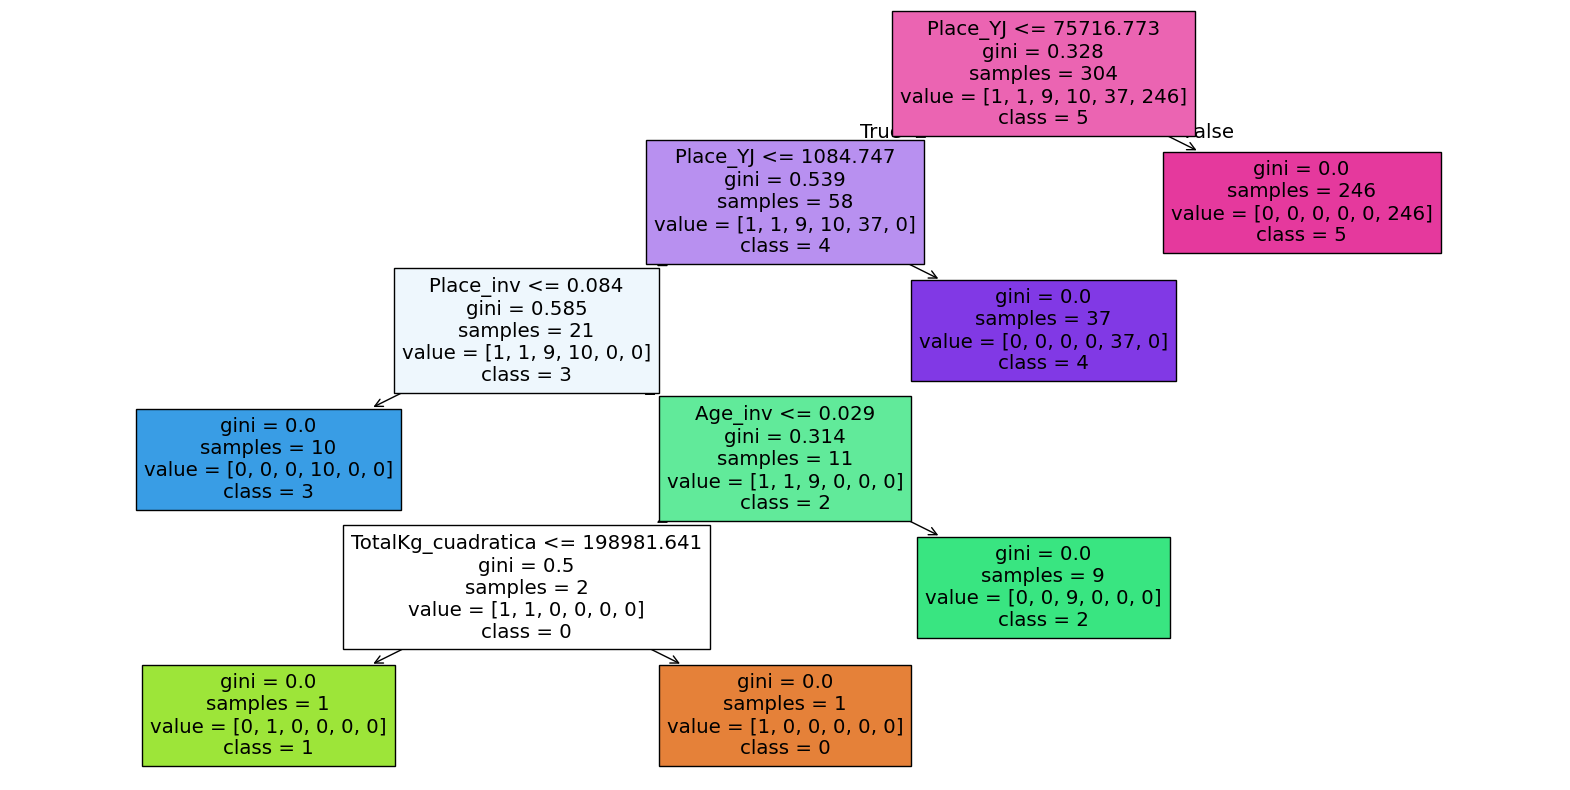

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(decision_tree, 
                   feature_names=predictors.columns,  
                   class_names=[str(cls) for cls in decision_tree.classes_], 
                   filled=True)
plt.show()

# 1.f RandomForest

In [37]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

rf_predicts = rf_classifier.predict(X_test_scaled)

acc = accuracy_score(rf_predicts, y_test)
print("Accuracy:", acc)

Accuracy: 0.8091603053435115


In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
hyper_parameters ={
    "n_estimators":[10,50,100,500,1000],
    "criterion":['gini','entropy'],
    "max_depth":[10,20]
}
rf_classifier = RandomForestClassifier()

#Configuraicón de optimización de hyper_parámetros.
rf_hyp_opt = GridSearchCV(estimator=rf_classifier, param_grid = hyper_parameters, cv=10, scoring= "roc_auc")

#Entrenamiento del modelo
rf_hyp_opt.fit(X_train_scaled, y_train)

c:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL 

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='roc_auc')

In [40]:
# socre del mejor modelo
rf_hyp_opt.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}

In [41]:
# socre del mejor modelo
rf_hyp_opt.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=10)

# 1.g Análisis de discriminante lineal


# 1.H Análisis de discriminante Cuadratico

In [54]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear el modelo QDA
qda = QuadraticDiscriminantAnalysis()

# Entrenar el modelo
qda.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = qda.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

ValueError: y has only 1 sample in class 0, covariance is ill defined.

# 1.I Ada bost

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Suponiendo que tienes un dataset con características X y etiquetas y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador AdaBoost con árboles de decisión como clasificadores débiles
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# Entrenar el modelo
ada.fit(X_train, y_train)

# Hacer predicciones
y_pred = ada.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

# 1.J Gradient Boosting


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Suponiendo que tienes un dataset con características X y etiquetas y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo
gb.fit(X_train, y_train)

# Hacer predicciones
y_pred = gb.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


# 1.k XGBoost

In [57]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Suponiendo que tienes un dataset con características X y etiquetas y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo
xgb_clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = xgb_clf.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

ModuleNotFoundError: No module named 'xgboost'

# 1.l LGBM

In [58]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Suponiendo que tienes un dataset con características X y etiquetas y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador LightGBM
lgb_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo
lgb_clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = lgb_clf.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

ModuleNotFoundError: No module named 'lightgbm'

Resultados de Optimazacion de Hiperparametros

In [59]:
hyp_opt_scores = pd.DataFrame(rf_hyp_opt.cv_results_)
hyp_opt_scores = sort_index("rank_test_score", ascending=True)

NameError: name 'sort_index' is not defined

Registro del Modelo

In [60]:
rf_v1 = RandomForestClassifier(criterion='entropy', max_depth=20,n_estimators=1000)

rf_v1.fit(X_train_scaled, y_train)

rf_v1_predicts = rf_v1_predicts(X_test_scaled)

roc_auc = Accuracy(rf_v1_predicts, y_test)
print("Accuracy:", cc)

NameError: name 'rf_v1_predicts' is not defined

In [61]:
modelo_final= RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=1000)

X_scaled =scaler.transform(X)
modelo_final.fit(X_scaled, y)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=1000)